# 1. Análisis individual 

In [98]:
import Cleaning_func as Cf
import Transform_func as Tf
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)

from scipy.stats import skew

In [99]:
filename= 'df_inv.pkl'
infile = open(filename,'rb')
df_ind = pickle.load(infile)
infile.close()

In [100]:
#Comenzando leyendo el Datafarme y ordenandolo por fecha
df_ind.sort_values('DateTime', inplace=True)
df_ind

,Type,DateTime,Person,Values,Date,Time,Weekday
1897212,DistanceWalkingRunning,2016-01-28 04:17:45+00:00,8,0.00844,2016-01-28,1900-01-01 04:17:45,3
1722684,StepCount,2016-01-28 04:17:45+00:00,8,12.00000,2016-01-28,1900-01-01 04:17:45,3
1897213,DistanceWalkingRunning,2016-01-28 08:34:31+00:00,8,0.00284,2016-01-28,1900-01-01 08:34:31,3
1897214,DistanceWalkingRunning,2016-01-28 08:40:08+00:00,8,0.02106,2016-01-28,1900-01-01 08:40:08,3
1722685,StepCount,2016-01-28 08:40:08+00:00,8,18.00000,2016-01-28,1900-01-01 08:40:08,3
...,...,...,...,...,...,...,...
3263565,ActiveEnergyBurned,2022-07-12 21:28:17+00:00,8,0.34800,2022-07-12,1900-01-01 21:28:17,1
3263566,ActiveEnergyBurned,2022-07-12 21:29:19+00:00,8,0.81900,2022-07-12,1900-01-01 21:29:19,1
3263567,ActiveEnergyBurned,2022-07-12 21:29:59+00:00,8,0.60100,2022-07-12,1900-01-01 21:29:59,1
3263568,ActiveEnergyBurned,2022-07-12 21:31:01+00:00,8,0.83700,2022-07-12,1900-01-01 21:31:01,1


In [101]:
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547916 entries, 1897212 to 1719249
Data columns (total 7 columns):
 #   Column    Non-Null Count    Dtype              
---  ------    --------------    -----              
 0   Type      1547916 non-null  object             
 1   DateTime  1547916 non-null  datetime64[ns, UTC]
 2   Person    1547916 non-null  int64              
 3   Values    1547916 non-null  float64            
 4   Date      1547916 non-null  datetime64[ns]     
 5   Time      1547916 non-null  datetime64[ns]     
 6   Weekday   1547916 non-null  int64              
dtypes: datetime64[ns, UTC](1), datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 94.5+ MB


## Estrés
Para analizar el estrés comenzaremos analizando conjuntamente las medidas que servirán como indicadores:
- Variabilidad del ritmo cardiaco
- Frecuencia cardiaca en reposo
- Ritmo respiratorio
- Pasos diarios (sedentarismo)
- Tiempo de sueño

In [103]:
df_rest = Tf.resume(df_ind)
df_rest.corr()

,StepCount,Weekday,Resp_Rate,HRV,Rest_HR
StepCount,1.000000,-0.028640,0.111196,0.057077,0.011276
Weekday,-0.028640,1.000000,0.006458,0.081088,0.052804
Resp_Rate,0.111196,0.006458,1.000000,-0.214850,0.204788
HRV,0.057077,0.081088,-0.214850,1.000000,-0.556869
Rest_HR,0.011276,0.052804,0.204788,-0.556869,1.000000


<AxesSubplot:>

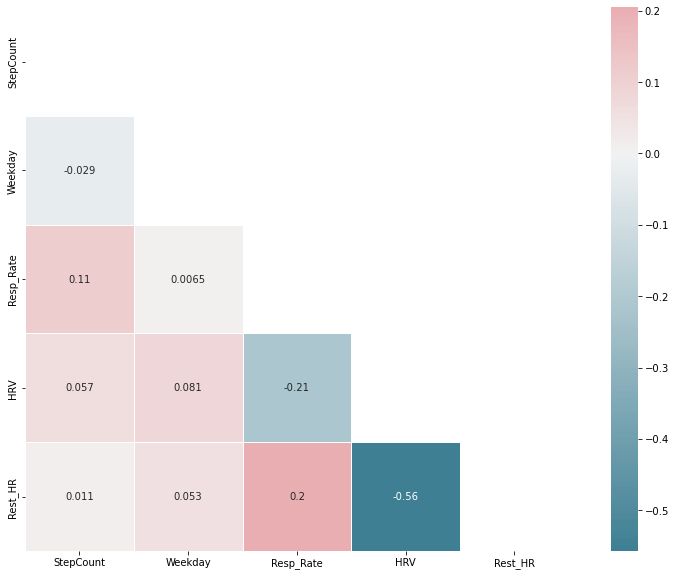

In [107]:
mask = np.triu(np.ones_like(df_rest.corr(), dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_rest.corr(), cmap =cmap, mask= mask, annot=True, center = 0, linewidths=.5, square = True)

`Observaciones`

1. reamos una matriz de correlación de Pearson para intentar identificar correlación lienal entre las variables, sin embargo, revisando los datos podemos ver que las tienen un índice de correlación bajo. 
2. Vemos que las variables más correlacionadas son: Variabilidad del ritmo cardiaco y ritmo cardiaco en reposo, lo cual se puede netender pues miden un mismo factor (el desempeño cardiaco)
3. Luego, vemos que la Variabilidad del ritmo cardiaco también tiene cierta correlación con el ritmo respiratorio, relación esperada pues existe un influencia fisiológica alta de la respiración en la variabilidad del ritmo cardiaco. 

Ahora, realizamos el análisis indivualmente de cada variable 

### Variabilidad del ritmo cardiaco

De acuerdo a la literatura una baja variabilidad en la frecuencia cardiaca está relacionada con aumento del estrés (baja actividad parasimpática)
Fuente: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5900369/ 

In [109]:
df_HRV = df_ind[df_ind['Type']== 'HeartRateVariabilitySDNN']
df_HRV

,Type,DateTime,Person,Values,Date,Time,Weekday
3518160,HeartRateVariabilitySDNN,2020-03-09 21:12:05+00:00,8,89.0204,2020-03-09,1900-01-01 21:12:05,0
3518161,HeartRateVariabilitySDNN,2020-03-09 21:43:07+00:00,8,23.8065,2020-03-09,1900-01-01 21:43:07,0
3518162,HeartRateVariabilitySDNN,2020-03-09 22:34:20+00:00,8,18.1039,2020-03-09,1900-01-01 22:34:20,0
3518163,HeartRateVariabilitySDNN,2020-03-10 00:18:33+00:00,8,63.2732,2020-03-10,1900-01-01 00:18:33,1
3518164,HeartRateVariabilitySDNN,2020-03-10 01:07:40+00:00,8,30.7612,2020-03-10,1900-01-01 01:07:40,1
...,...,...,...,...,...,...,...
3524852,HeartRateVariabilitySDNN,2022-07-12 06:30:16+00:00,8,87.9062,2022-07-12,1900-01-01 06:30:16,1
3524853,HeartRateVariabilitySDNN,2022-07-12 11:15:28+00:00,8,14.3875,2022-07-12,1900-01-01 11:15:28,1
3524854,HeartRateVariabilitySDNN,2022-07-12 12:30:19+00:00,8,23.9831,2022-07-12,1900-01-01 12:30:19,1
3524855,HeartRateVariabilitySDNN,2022-07-12 14:30:04+00:00,8,51.3079,2022-07-12,1900-01-01 14:30:04,1


<AxesSubplot:xlabel='Date', ylabel='Values'>

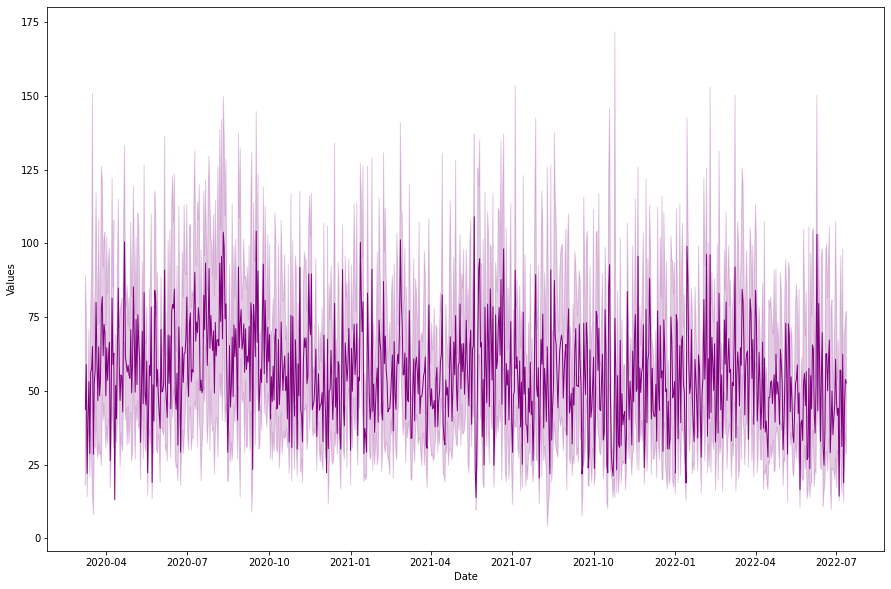

In [110]:
sns.lineplot(x='Date' , y='Values', data=df_HRV, color='purple', linewidth=1)

<AxesSubplot:xlabel='Date', ylabel='Values'>

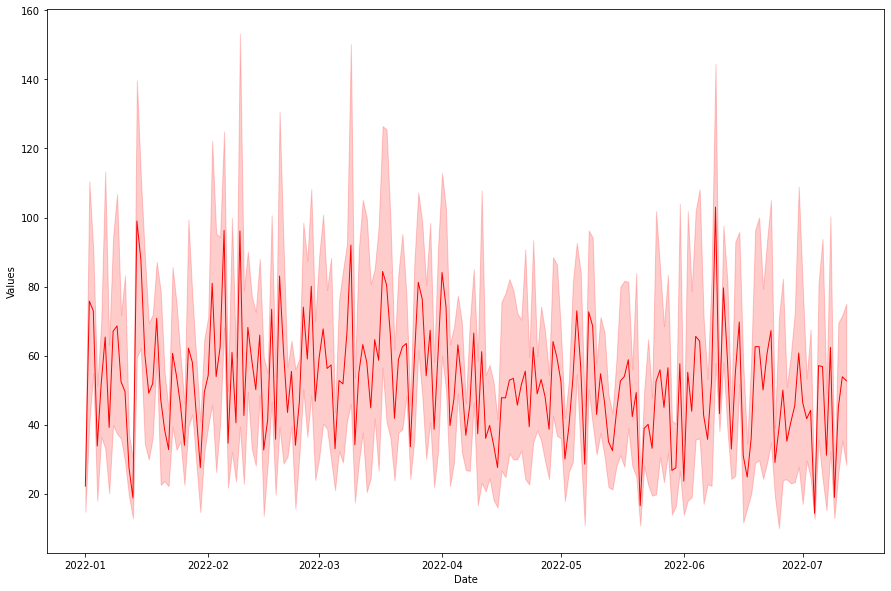

In [111]:
#Al tener tantos registros intentamos reducir la escala y mediremos solo la vriabilidad en el último año
df_HRV_2002= df_ind[(df_ind['Type']== 'HeartRateVariabilitySDNN') & (df_ind['Date'].dt.year == 2022)]
sns.lineplot(x='Date' , y='Values', data= df_HRV_2002, color='red', linewidth=1)

In [112]:
# observamos que hay muchos periodos bajos de HRV en el tiempo estudiado 
# lo que podría indicar un individuo sometido a muchos periodos de estrés de forma constante

In [113]:
#Como sigue sienod muy amplio el rango y dificil de visualizar sacamos la variabilidad media por cada fecha
df_HRV_2002 = df_HRV_2002.groupby('Date').agg({'Values':'mean'})

<AxesSubplot:xlabel='Date', ylabel='Values'>

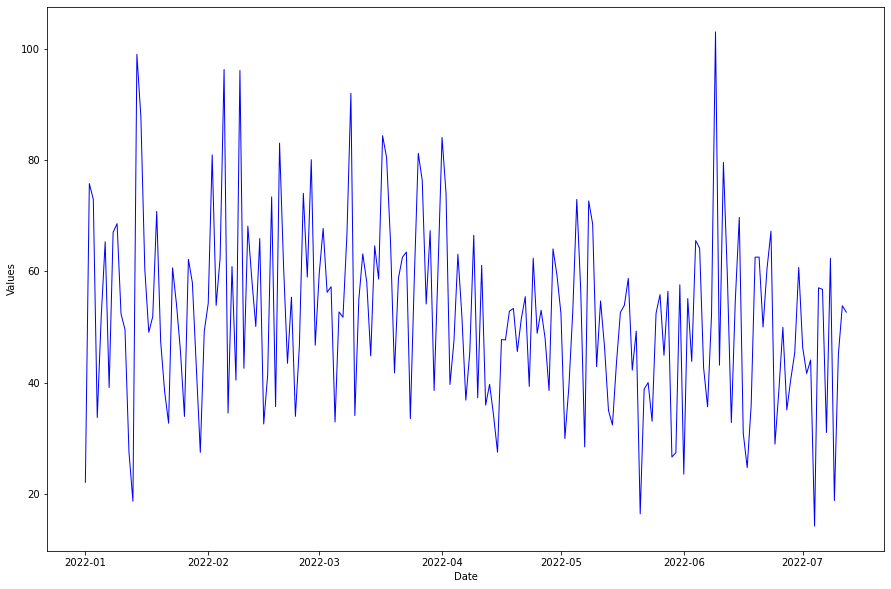

In [114]:
sns.lineplot(x='Date' , y='Values', data=df_HRV_2002.groupby('Date').agg({'Values':'mean'}), color='blue', linewidth=1)

<AxesSubplot:xlabel='Values'>

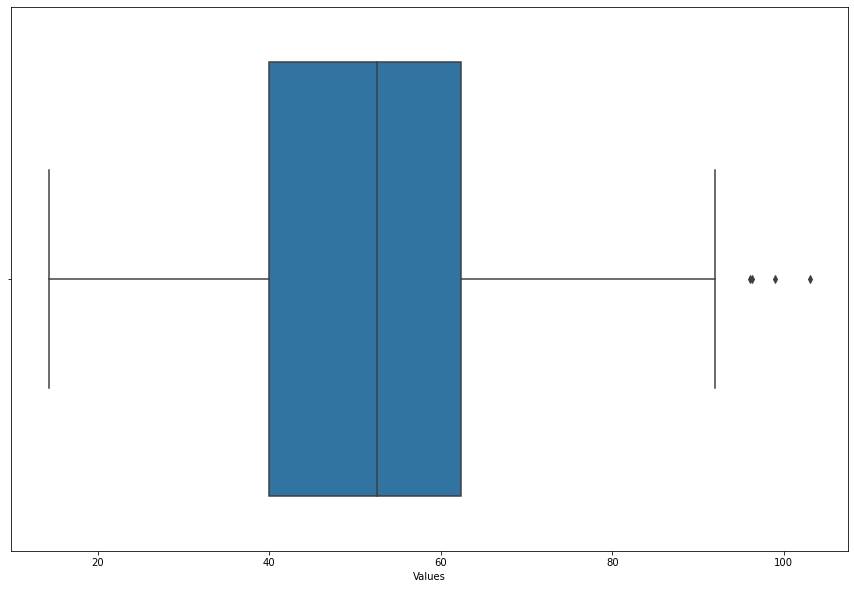

In [115]:
# Usamos un boxplot para identificar los aoutliers de forma gráfica 
sns.boxplot(x="Values", data= df_HRV_2002)

<AxesSubplot:xlabel='Values', ylabel='Density'>

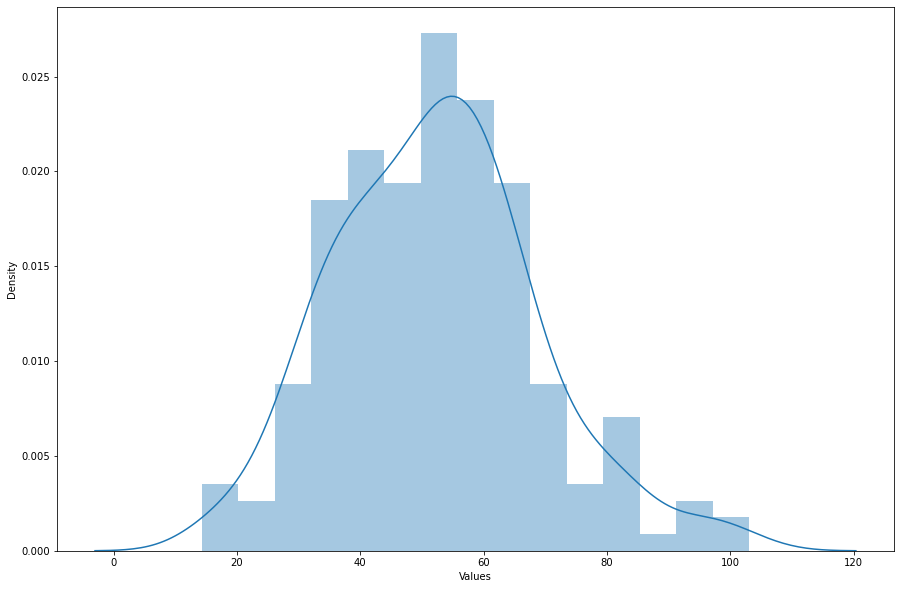

In [116]:
#Revisamos la distribución de los datos 
sns.distplot(df_HRV_2002['Values'], bins = 15) 

In [117]:
#Al notar que el box plot solo identifica outliers en la parte superrior
# Y que la distribución de los dato es parecida a una distribución normal
# usamos otro método pr obetener los valores más bajo que son los que interesan en este caso para identificar
# picos de estrés según la baja HRV

In [131]:
#calculamos el corte de los outliers por debajo de dos veces la desviaciónes estándar 
print(df_HRV_2002['Values'].mean())
print(df_HRV_2002['Values'].std())
out_1 = df_HRV_2002['Values'].mean() - df_HRV_2002['Values'].std()*2
out_1

52.304401633472615
16.523873932012673


19.25665376944727

In [126]:
#También identificamos el primer decil para identificar el corte de los valores dentro del 10% más bajos
out_2= df_HRV_2002['Values'].quantile(0.10)
out_2

32.769525333333334

In [127]:
df_HRV_2002[df_HRV_2002['Values'] < df_HRV_2002['Values'].quantile(0.10)]

,Values
Date,
2022-01-01,22.157582
2022-01-12,27.568756
2022-01-13,18.740367
2022-01-22,32.756680
2022-01-30,27.526750
2022-02-15,32.622916
2022-04-15,27.545071
2022-05-02,30.013252
2022-05-07,28.507595


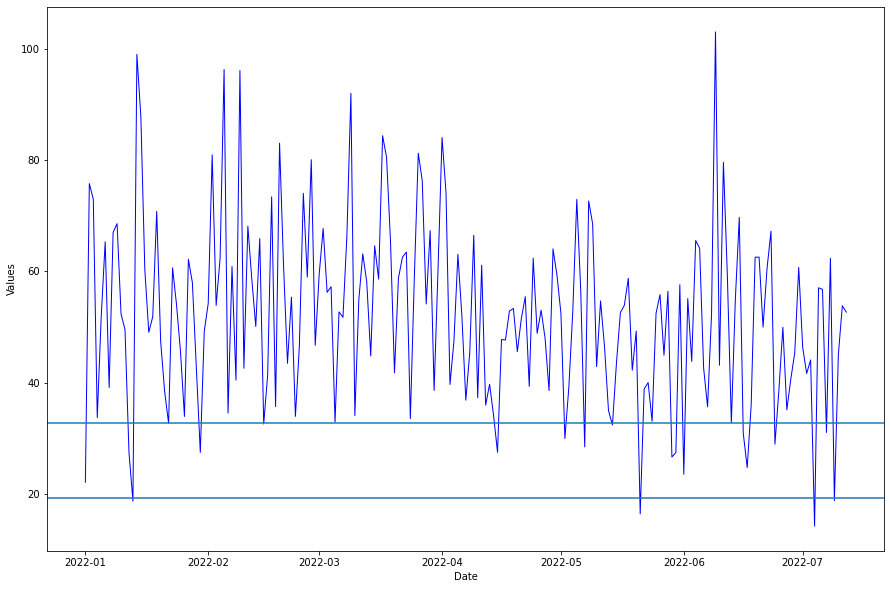

In [136]:
#Volvemos a identificar los datos del 2022 con las lineas de los outliers
fig= sns.lineplot(x='Date' , y='Values', data=df_HRV_2002.groupby('Date').agg({'Values':'mean'}), color='blue', linewidth=1)
fig.axhline(out_1)
fig.axhline(out_2)
plt.show()

In [128]:
#Como sigue siendo muy amplio el rango y dificil de visualizar, medimos solo 2 meses: marzo y junio 2022
df_HRV_2002.reset_index(inplace = True)

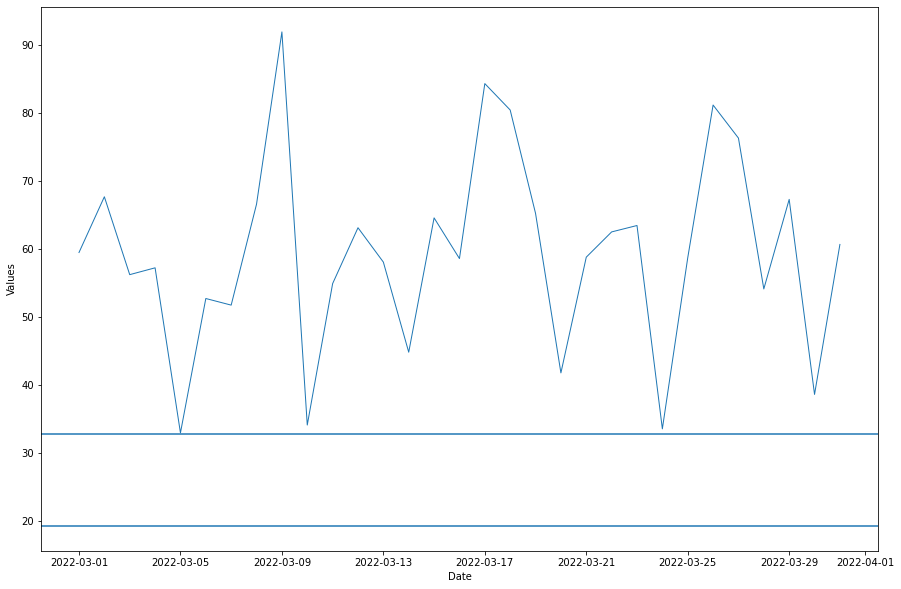

In [134]:
graph = sns.lineplot(x='Date' , y='Values', data=df_HRV_2002[df_HRV_2002['Date'].dt.month==3], linewidth=1)
graph.axhline(out_1)
graph.axhline(out_2)
plt.show()

In [ ]:
#En Marzo observamos que  pesar que hubo picos de baja variabilidad cardiaca (5/10/24) 
# Estos valores no estuvieron entrel 10% más bajo del año

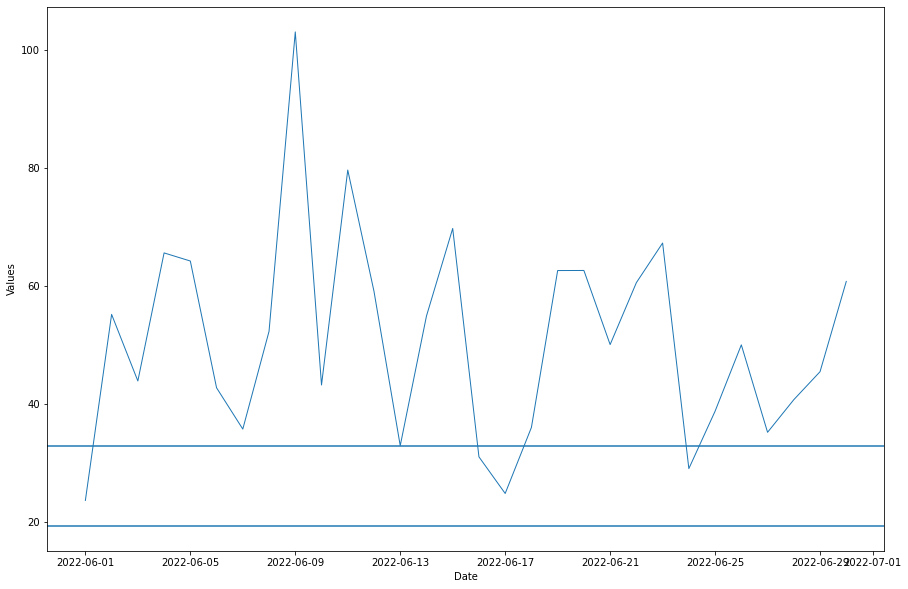

In [135]:
graph_2 = sns.lineplot(x='Date' , y='Values', data=df_HRV_2002[df_HRV_2002['Date'].dt.month==6], linewidth=1)
graph_2.axhline(out_1)
graph_2.axhline(out_2)
plt.show()

In [ ]:
#En junio observamos que sí hubo picos de baja variabilidad cardiaca (1/16/17/24) que pueden indicar días de mucho estrés

### Pasos 

In [51]:
#Medimos el mismo periodo de tiempo para la variable de pasos 
df_steps = df_ind[(df_ind['Type']== 'StepCount') & (df_ind['Date'].dt.year == 2022)]
df_steps

,Type,DateTime,Person,Values,Date,Time,Weekday
1876390,StepCount,2022-01-01 00:06:46+00:00,8,120.0,2022-01-01,1900-01-01 00:06:46,5
1876391,StepCount,2022-01-01 00:13:35+00:00,8,22.0,2022-01-01,1900-01-01 00:13:35,5
1876392,StepCount,2022-01-01 00:31:49+00:00,8,214.0,2022-01-01,1900-01-01 00:31:49,5
1876393,StepCount,2022-01-01 00:38:48+00:00,8,449.0,2022-01-01,1900-01-01 00:38:48,5
1876394,StepCount,2022-01-01 00:54:14+00:00,8,179.0,2022-01-01,1900-01-01 00:54:14,5
...,...,...,...,...,...,...,...
1895833,StepCount,2022-07-12 20:21:51+00:00,8,12.0,2022-07-12,1900-01-01 20:21:51,1
1895835,StepCount,2022-07-12 20:21:51+00:00,8,34.0,2022-07-12,1900-01-01 20:21:51,1
1895836,StepCount,2022-07-12 20:36:28+00:00,8,142.0,2022-07-12,1900-01-01 20:36:28,1
1895837,StepCount,2022-07-12 21:14:21+00:00,8,34.0,2022-07-12,1900-01-01 21:14:21,1


<AxesSubplot:xlabel='Date', ylabel='Values'>

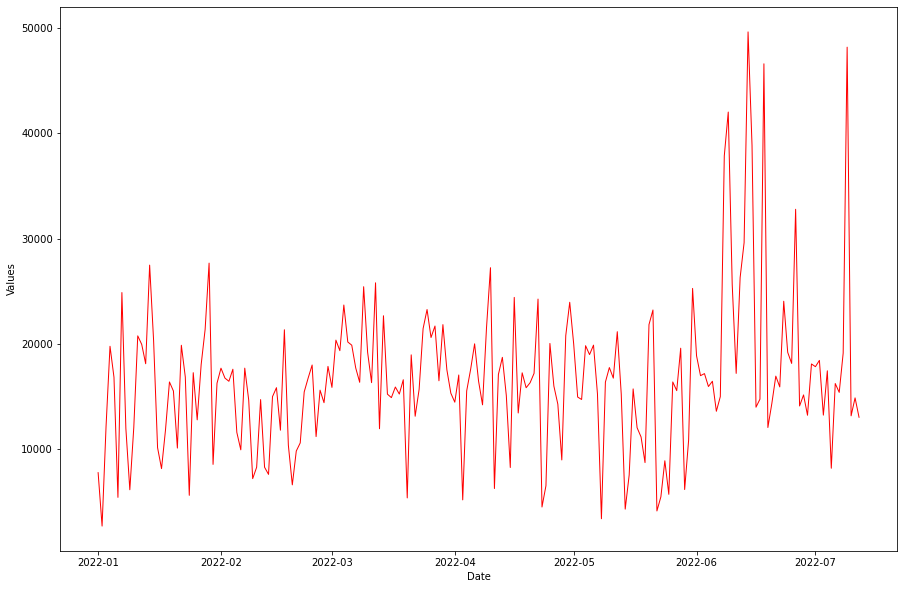

In [56]:
#Para medir correctamente, hacemos una sumatoria de los pasos para ver el acumulado por día
Steps_sum = df_steps.groupby(by='Date').agg({'Values':'sum'})
sns.lineplot(x='Date' , y='Values', data=Steps_sum, color='red', linewidth=1)

<AxesSubplot:ylabel='Density'>

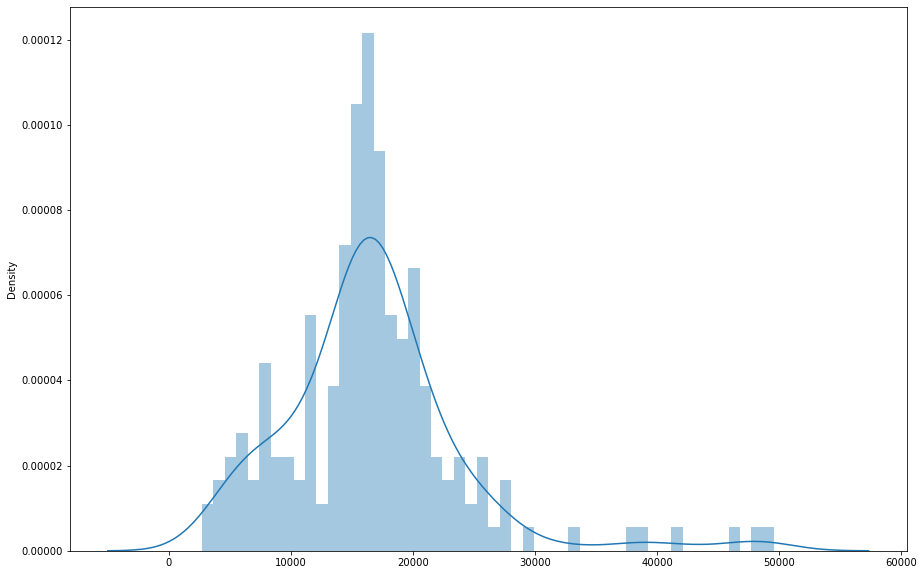

In [138]:
#Revisamos la distribución de los pasos  
sns.distplot(Steps_sum, bins = 50) 

In [139]:
# Vemos que es menos parecida a una normal, pues tiene muchos más outliers a la derecha de la curva. 

<AxesSubplot:xlabel='Date', ylabel='Values'>

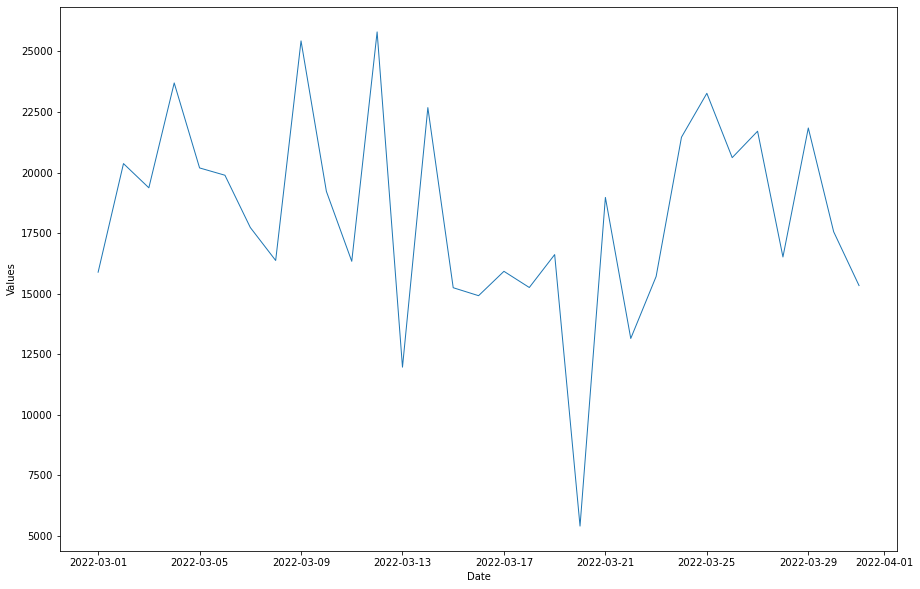

In [63]:
#Visualizamos pare le mes de marzo
Steps_sum_3 = df_steps[df_steps['Date'].dt.month==3].groupby(by='Date').agg({'Values':'sum'})
sns.lineplot(x='Date' , y='Values', data=Steps_sum_3, linewidth=1)

<AxesSubplot:xlabel='Date', ylabel='Values'>

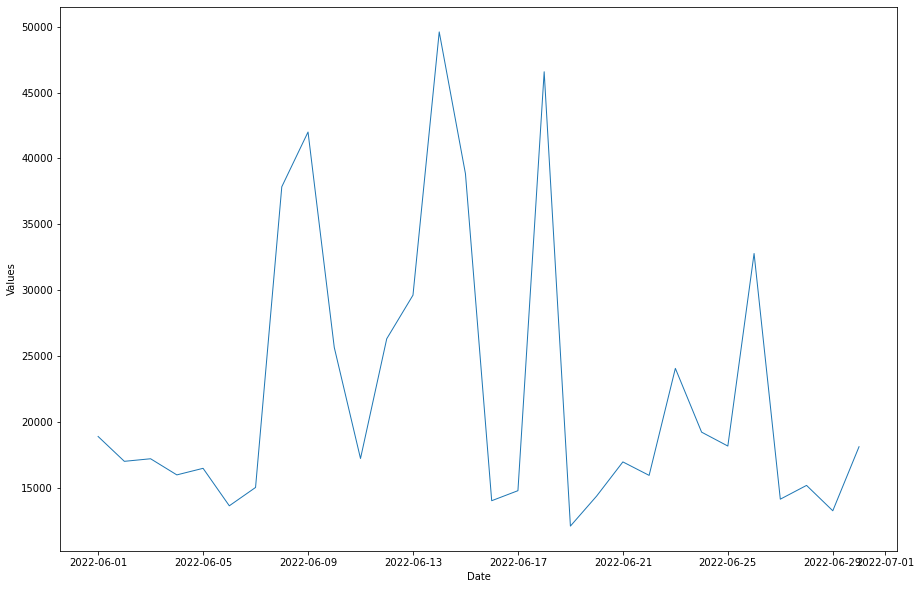

In [66]:
#Visualizamos pare le mes de junio
Steps_sum_6 = df_steps[df_steps['Date'].dt.month==6].groupby(by='Date').agg({'Values':'sum'})
sns.lineplot(x='Date' , y='Values', data=Steps_sum_6, linewidth=1)

In [ ]:
#observamos, a diferencia de la variable anterior, el individuo tiene picos de mucho movimiento
# y otros de movimiento moderado o esperado, entre los 10 y 20 mil pasos 

### Frecuencia cardiaca en reposo
En general l mayoría de los individuos experimentnaod estrés presentan una frecuencia cardiaca en reposo más elevada. 

"La media (percentil 50 de todos los casos) es un aumento de 1 latido por minuto (ppm). Teniendo en cuenta que la FCR suele ser una medida bastante estable, se trata de una desviación considerable de la norma. En el percentil 25, el aumento es de 2 latidos por minuto."

FUente: https://www.whoop.com/thelocker/stress-hrv-resting-heart-rate/#:~:text=Stress%20and%20Resting%20Heart%20Rate,beat%20per%20minute%20(bpm).

<AxesSubplot:xlabel='Date', ylabel='Values'>

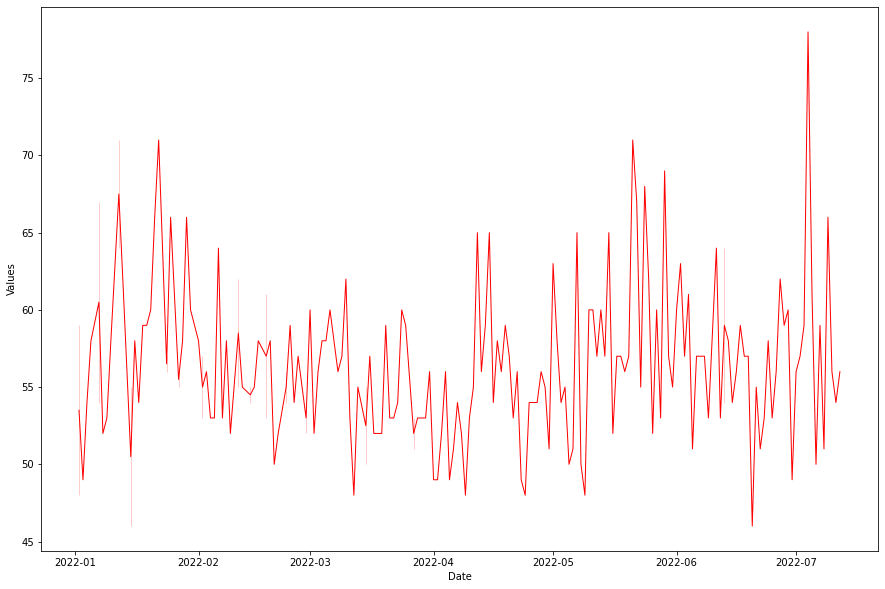

In [70]:
df_Rest_HR = df_ind[(df_ind['Type']== 'RestingHeartRate') & (df_ind['Date'].dt.year == 2022)]
sns.lineplot(x='Date' , y='Values', data= df_Rest_HR, color='red', linewidth=1)

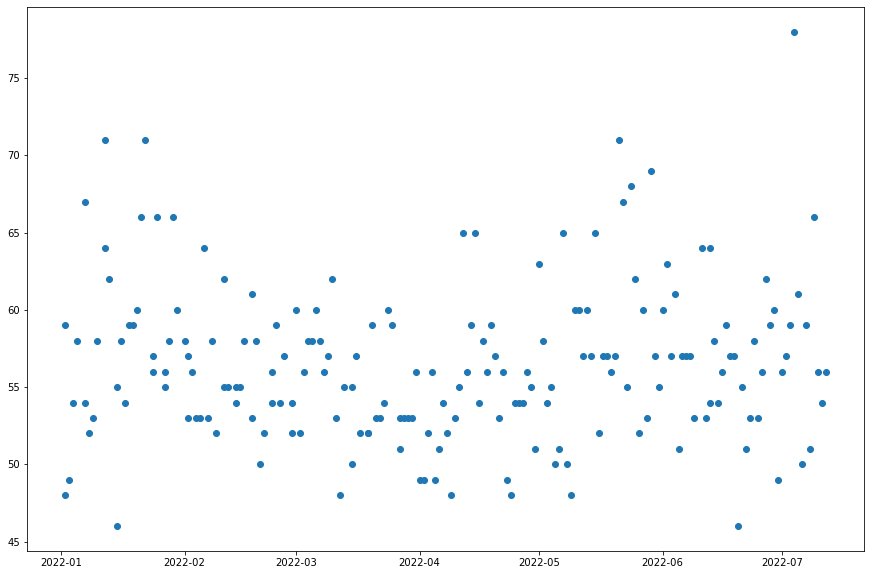

In [180]:
plt.scatter(df_Rest_HR.Date, df_Rest_HR.Values)

In [71]:
#Calculamos al media del año
df_Rest_HR['Values'].mean()

56.45077720207254

<AxesSubplot:xlabel='Values'>

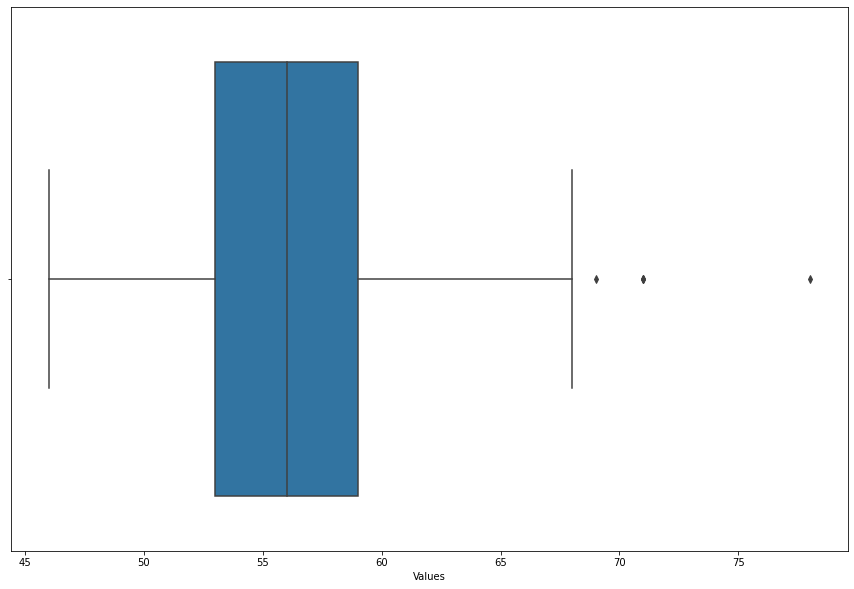

In [72]:
# Usamos un boxplot para identificar los aoutliers de forma gráfica 
sns.boxplot(x="Values", data= df_Rest_HR)

<AxesSubplot:xlabel='Values', ylabel='Density'>

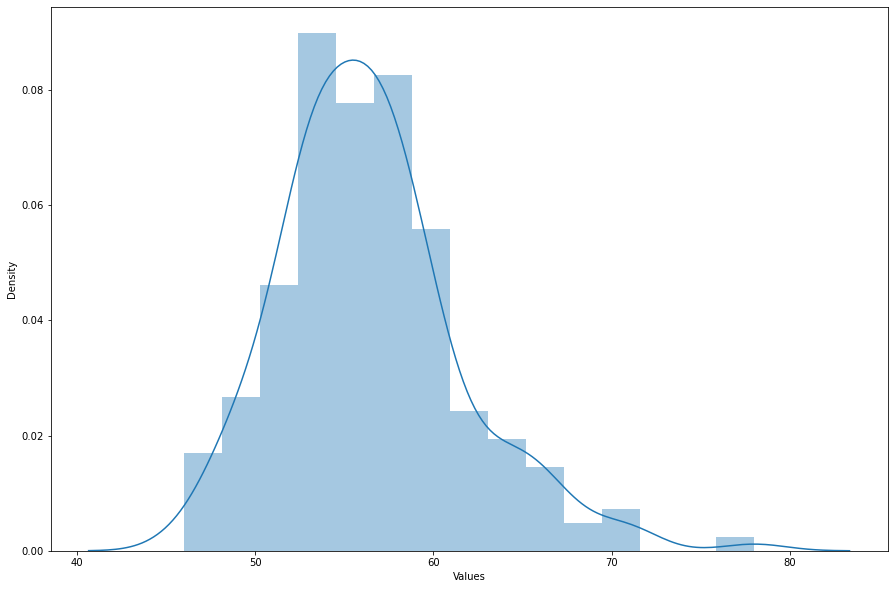

In [140]:
 #Revisamos la distribución de los datos 
sns.distplot(df_Rest_HR['Values'], bins = 15) 

In [150]:
#Identificamos nuestras 2 líneas de outliers superiores
out_1 = df_Rest_HR['Values'].mean() + df_Rest_HR['Values'].std()*2
out_2= df_Rest_HR['Values'].quantile(0.90)
print(out_1)
print(out_2)

66.65063666129599
63.80000000000001


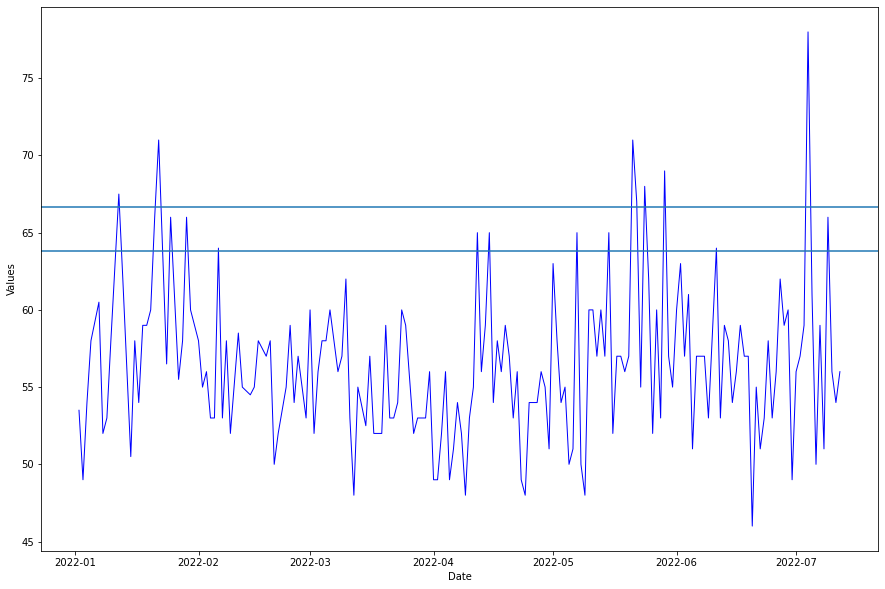

In [142]:
fig= sns.lineplot(x='Date' , y='Values', data=df_Rest_HR.groupby('Date').agg({'Values':'mean'}), color='blue', linewidth=1)
fig.axhline(out_1)
fig.axhline(out_2)
plt.show()

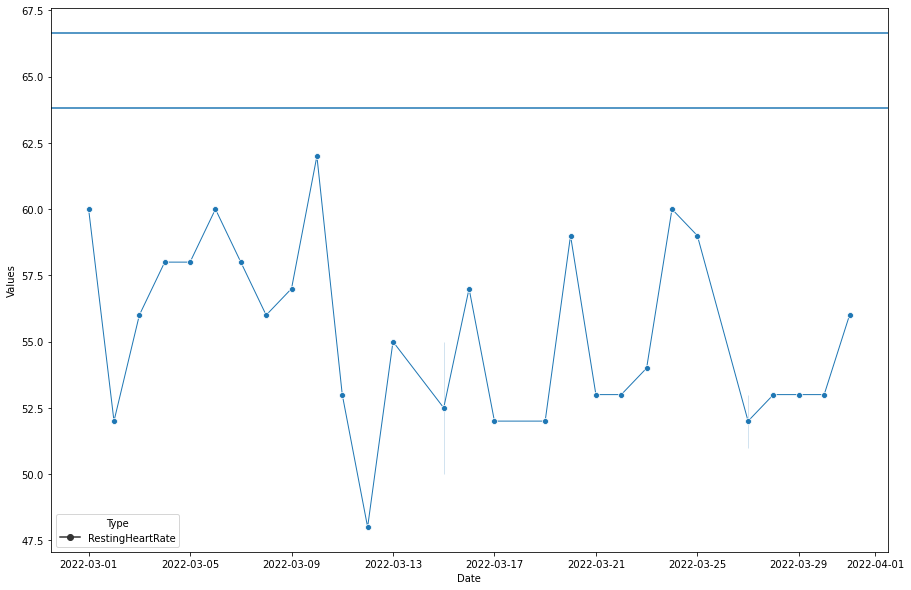

In [145]:
#observamos la distribución de valores de marzo
graph_3 = sns.lineplot(x='Date' , y='Values', data=df_Rest_HR[df_Rest_HR['Date'].dt.month==3], linewidth=1, style ='Type',  markers=True, dashes=False)
graph_3.axhline(out_1)
graph_3.axhline(out_2)
plt.show()

In [ ]:
#En Marzo observamos que los picos de RHR no están cerca de nuestras líneas de outliers
# los picos los ubicamos los días 10, 20 y24

In [148]:
#revisamos los datos para comprobar estas observaciones
df_Rest_HR[df_Rest_HR['Date'].dt.month==3]

,Type,DateTime,Person,Values,Date,Time,Weekday
3296573,RestingHeartRate,2022-03-01 14:34:29+00:00,8,60.0,2022-03-01,1900-01-01 14:34:29,1
3296574,RestingHeartRate,2022-03-02 23:41:26+00:00,8,52.0,2022-03-02,1900-01-01 23:41:26,2
3296575,RestingHeartRate,2022-03-03 14:55:50+00:00,8,56.0,2022-03-03,1900-01-01 14:55:50,3
3296576,RestingHeartRate,2022-03-04 14:21:01+00:00,8,58.0,2022-03-04,1900-01-01 14:21:01,4
3296577,RestingHeartRate,2022-03-05 07:26:36+00:00,8,58.0,2022-03-05,1900-01-01 07:26:36,5
3296578,RestingHeartRate,2022-03-06 19:05:32+00:00,8,60.0,2022-03-06,1900-01-01 19:05:32,6
3296579,RestingHeartRate,2022-03-07 21:15:34+00:00,8,58.0,2022-03-07,1900-01-01 21:15:34,0
3296580,RestingHeartRate,2022-03-08 22:20:28+00:00,8,56.0,2022-03-08,1900-01-01 22:20:28,1
3296581,RestingHeartRate,2022-03-09 09:27:36+00:00,8,57.0,2022-03-09,1900-01-01 09:27:36,2
3296582,RestingHeartRate,2022-03-10 19:00:26+00:00,8,62.0,2022-03-10,1900-01-01 19:00:26,3


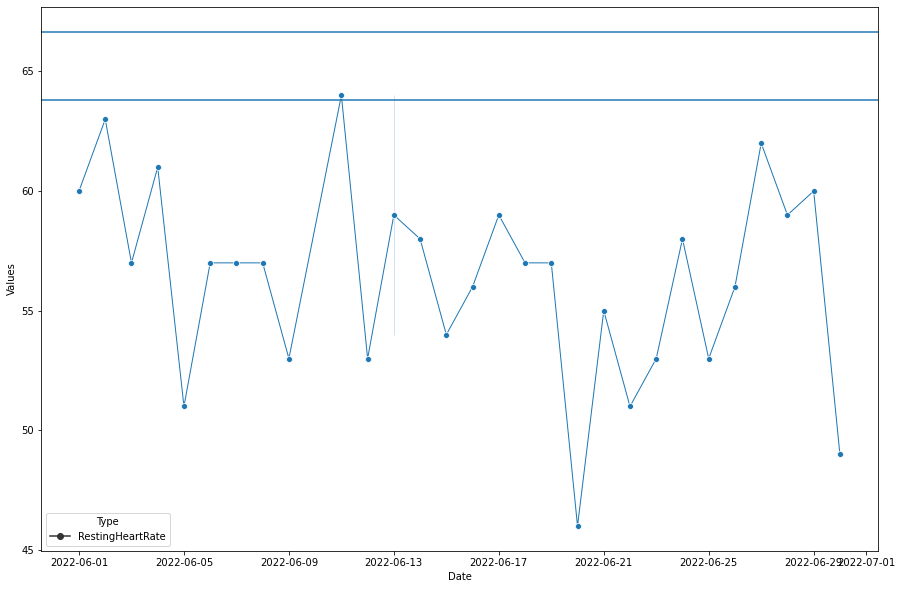

In [146]:
#observamos la distribución de valores de junio
graph_4 = sns.lineplot(x='Date' , y='Values', data=df_Rest_HR[df_Rest_HR['Date'].dt.month==6], linewidth=1, style ='Type',  markers=True, dashes=False)
graph_4.axhline(out_1)
graph_4.axhline(out_2)
plt.show()

In [ ]:
#En junio observamos sí podemos observar que hay un valor sobre nuestro outlier de RHR
# y los picos los ubicamos los días 4, 13, 27

In [149]:
df_Rest_HR[df_Rest_HR['Date'].dt.month==6]

,Type,DateTime,Person,Values,Date,Time,Weekday
3296665,RestingHeartRate,2022-06-01 23:57:45+00:00,8,60.0,2022-06-01,1900-01-01 23:57:45,2
3296667,RestingHeartRate,2022-06-02 23:54:22+00:00,8,63.0,2022-06-02,1900-01-01 23:54:22,3
3296666,RestingHeartRate,2022-06-03 21:58:18+00:00,8,57.0,2022-06-03,1900-01-01 21:58:18,4
3296668,RestingHeartRate,2022-06-04 20:18:52+00:00,8,61.0,2022-06-04,1900-01-01 20:18:52,5
3296669,RestingHeartRate,2022-06-05 17:46:50+00:00,8,51.0,2022-06-05,1900-01-01 17:46:50,6
3296670,RestingHeartRate,2022-06-06 23:58:02+00:00,8,57.0,2022-06-06,1900-01-01 23:58:02,0
3296671,RestingHeartRate,2022-06-07 17:53:18+00:00,8,57.0,2022-06-07,1900-01-01 17:53:18,1
3296672,RestingHeartRate,2022-06-08 21:19:33+00:00,8,57.0,2022-06-08,1900-01-01 21:19:33,2
3296673,RestingHeartRate,2022-06-09 17:25:46+00:00,8,53.0,2022-06-09,1900-01-01 17:25:46,3
3296674,RestingHeartRate,2022-06-11 00:24:59+00:00,8,64.0,2022-06-11,1900-01-01 00:24:59,5


### Ritmo respiratorio
"Se observa un aumento de la frecuencia respiratoria y un mayor número de suspiros durante el estrés mental."
Fuente: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3872389/#:~:text=An%20increase%20in%20the%20respiratory,during%20stress%20for%20this%20subject. 

<AxesSubplot:xlabel='Date', ylabel='Values'>

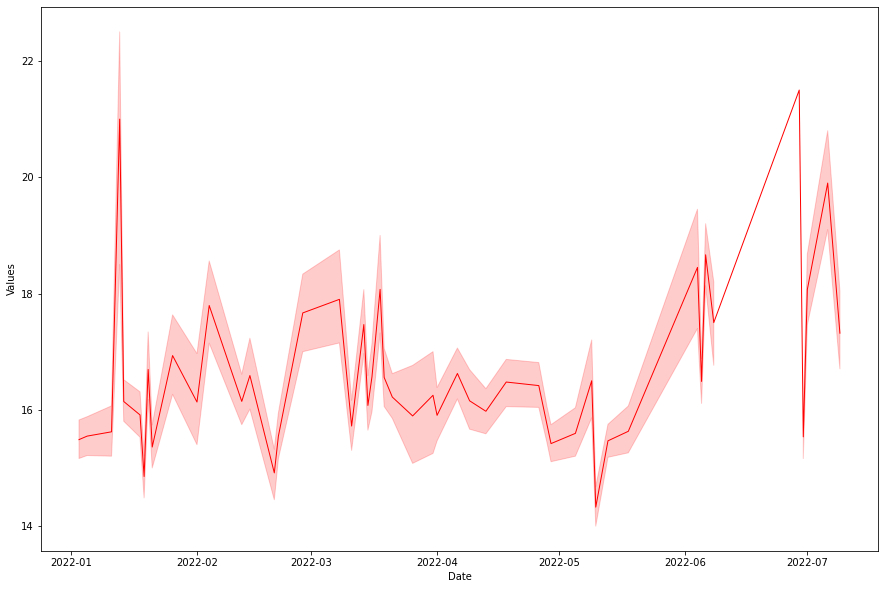

In [151]:
Resp_df = df_ind[(df_ind['Type']== 'RespiratoryRate') & (df_ind['Date'].dt.year == 2022)]
sns.lineplot(x='Date' , y='Values', data= Resp_df, color='red', linewidth=1)

In [152]:
#Vemos que hay pocos datos de esta variable por lo que será dificil de analizar

<AxesSubplot:xlabel='Values'>

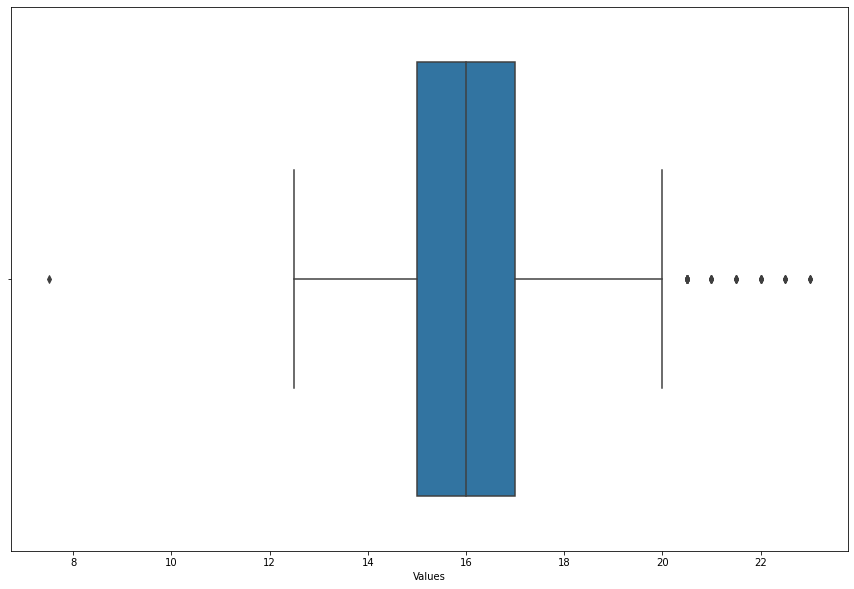

In [153]:
sns.boxplot(x="Values", data= Resp_df)

<AxesSubplot:xlabel='Values', ylabel='Density'>

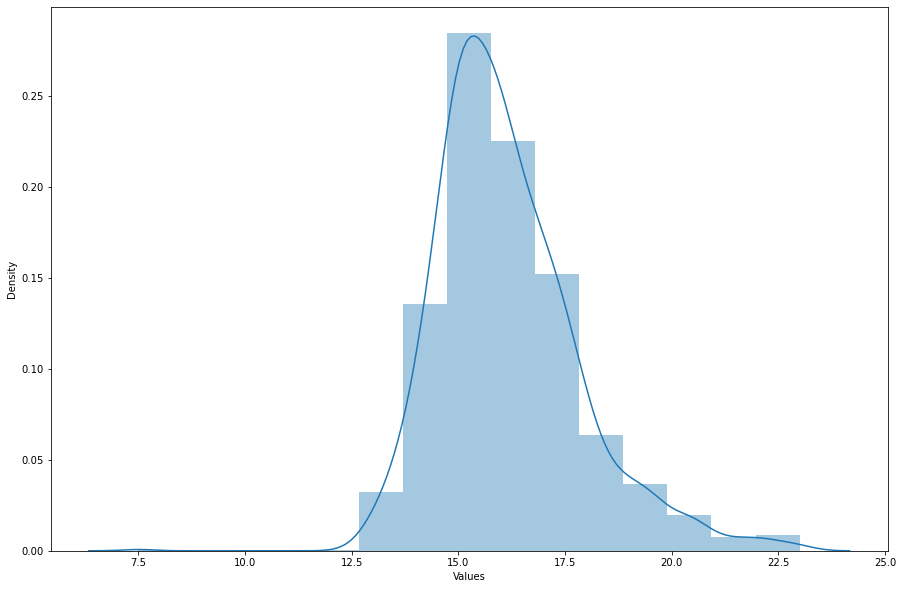

In [181]:
 #Revisamos la distribución de los datos 
sns.distplot(Resp_df['Values'], bins = 15) 

In [184]:
# Identificamos outliers 
out_1 = Resp_df['Values'].mean() + Resp_df['Values'].std()*2
out_2= Resp_df['Values'].quantile(0.90)
print(out_1)
print(out_2)

19.48491175203232
18.0


NameError: name 'fig_·' is not defined

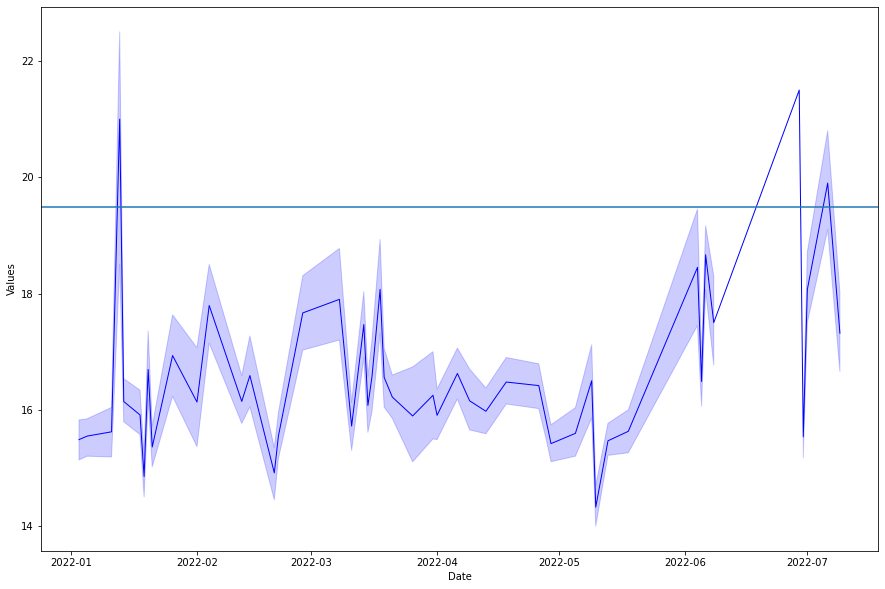

In [185]:
fig_3= sns.lineplot(x='Date' , y='Values', data=Resp_df[Resp_df['Date'].dt.year>2021], color='blue', linewidth=1)
fig_3.axhline(out_1)
fig_·.axhline(out_2)
plt.show()

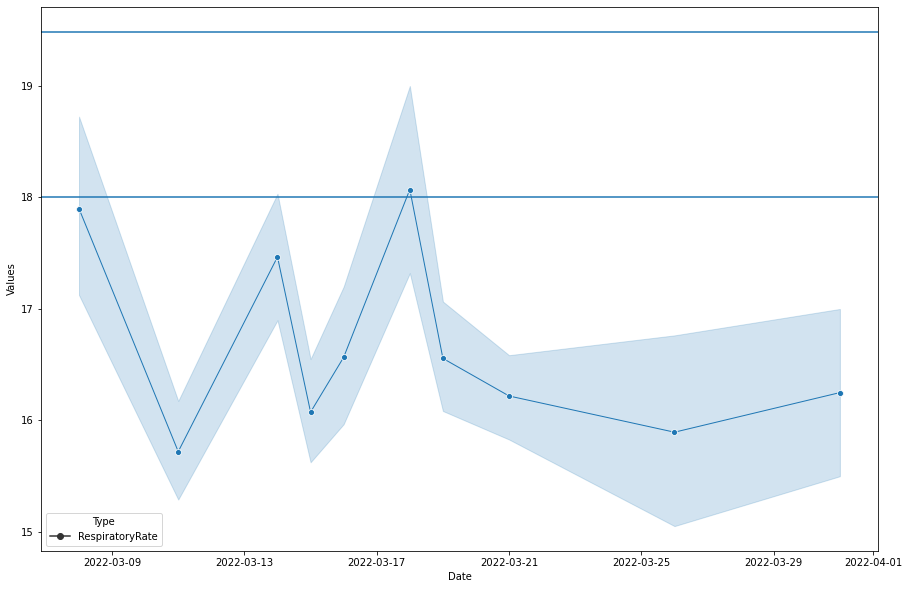

In [158]:
fig_4= sns.lineplot(x='Date', y='Values', data=Resp_df[Resp_df['Date'].dt.month==3], linewidth=1, style ='Type', markers=True, dashes=False)
fig_4.axhline(out_1)
fig_4.axhline(out_2)
plt.show()

In [ ]:
# Picos de marzo el 14 y 18

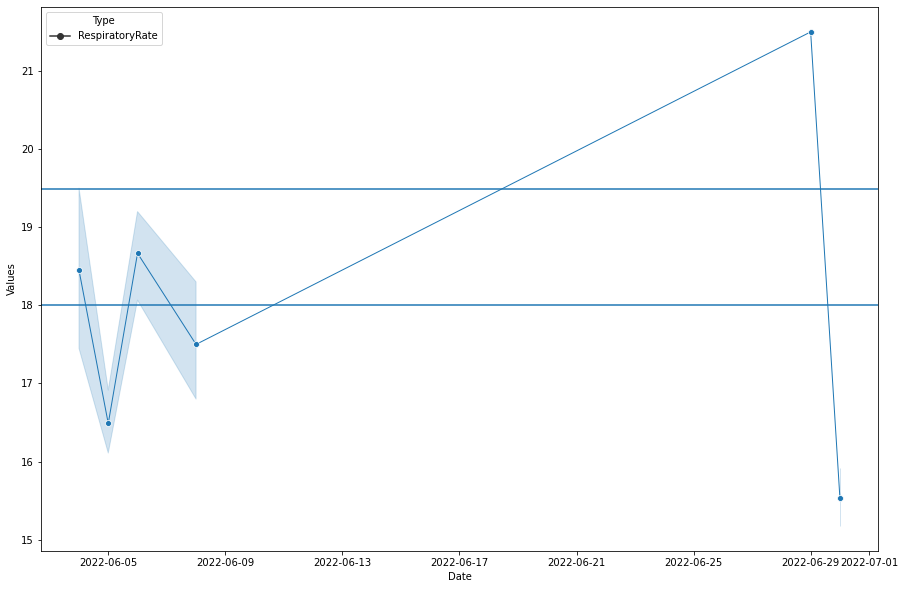

In [164]:
graph_5 = sns.lineplot(x='Date' , y='Values', data=Resp_df[Resp_df['Date'].dt.month==6], linewidth=1, style ='Type', markers=True, dashes=False)
graph_5.axhline(out_1)
graph_5.axhline(out_2)
plt.show()

In [ ]:
# Outliers de junio el 4, 6 y 30

### Tiempo de sueño
 Estudios afirman que en los indiviuos el estrés aumenta cuando la duración y la calidad de su sueño disminuyen.
 Fuente: https://www.apa.org/news/press/releases/stress/2013/sleep 

In [166]:
filename= 'sl_comparer.pkl'
infile = open(filename,'rb')
sleep_df = pickle.load(infile)
infile.close()

In [167]:
sleep_df['Date'] = pd.to_datetime(sleep_df['Date'])
sleep_data= sleep_df[(sleep_df['Person']==8) & (sleep_df['Date'].dt.year == 2022)]
sleep_data

,Date,Person,Time_Asleep,Time_in_bed
1600,2022-01-01,8,6.466667,6.466667
1603,2022-01-02,8,9.466667,9.466667
1606,2022-01-03,8,13.741667,13.741667
1609,2022-01-04,8,6.333333,6.333333
1612,2022-01-05,8,15.350000,15.350000
...,...,...,...,...
2076,2022-07-08,8,6.766667,6.766667
2080,2022-07-09,8,3.566667,3.566667
2082,2022-07-10,8,6.850000,6.850000
2084,2022-07-11,8,6.283333,6.283333


<AxesSubplot:xlabel='Date', ylabel='Time_Asleep'>

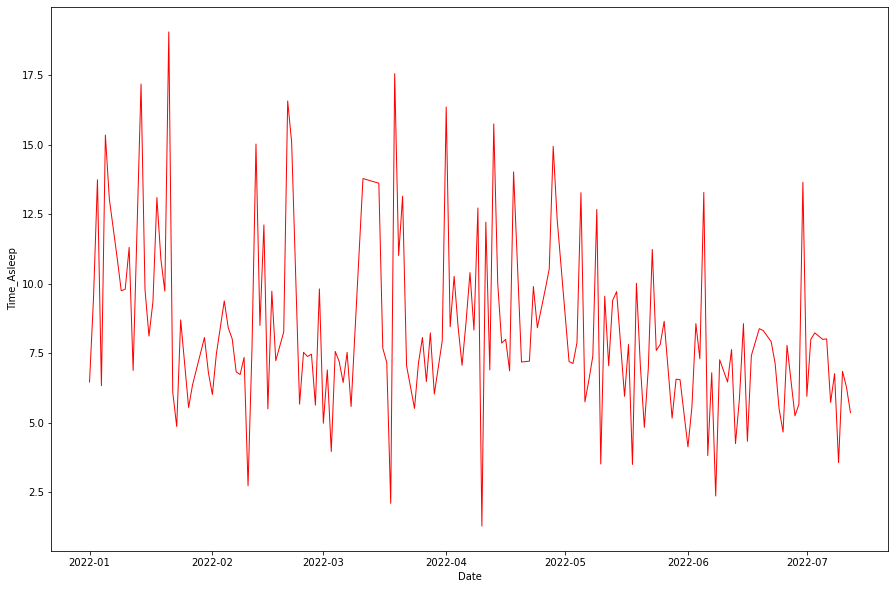

In [89]:
sns.lineplot(x='Date' , y='Time_Asleep', data= sleep_data, color='red', linewidth=1)

<AxesSubplot:xlabel='Time_Asleep'>

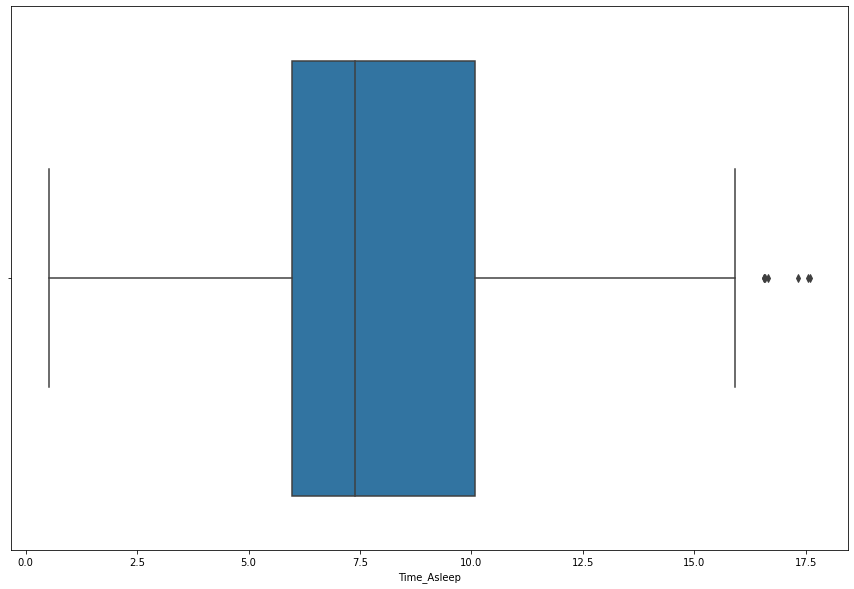

In [169]:
sns.boxplot(x="Time_Asleep", data= sleep_data)

<AxesSubplot:xlabel='Time_Asleep', ylabel='Density'>

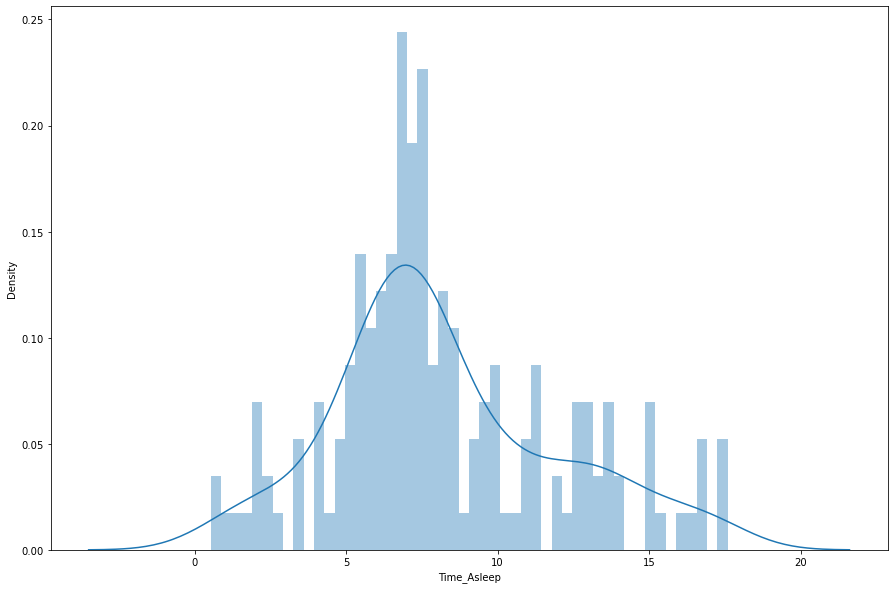

In [172]:
#Revisamos la distribución de los pasos  
sns.distplot(sleep_data['Time_Asleep'], bins=50) 

In [187]:
# Identificamos outliers 
out_1 = sleep_data['Time_Asleep'].mean() - Resp_df['Values'].std()*2
out_2= sleep_data['Time_Asleep'].quantile(0.10)
print(out_1)
print(out_2)

4.868873097377526
4.128333333333334


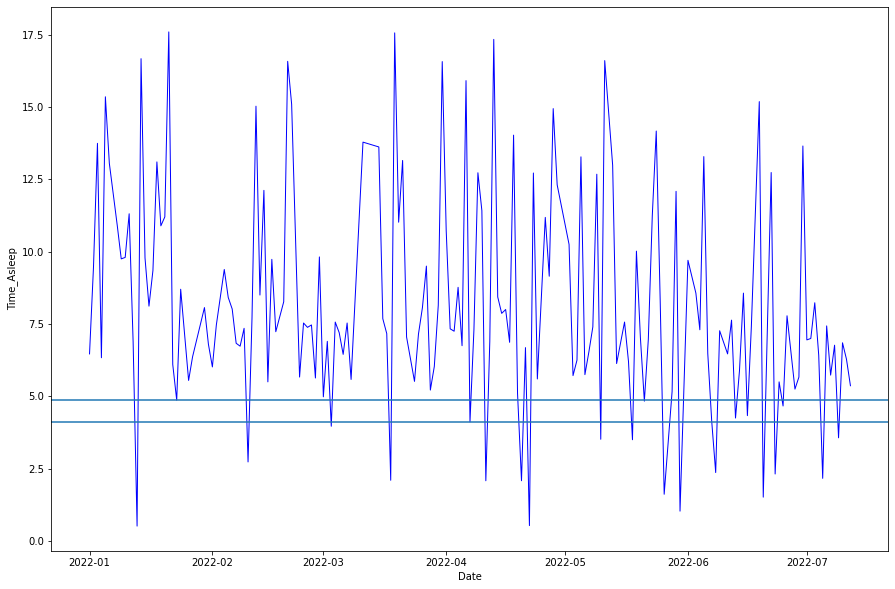

In [189]:
fig_6 = sns.lineplot(x='Date' , y='Time_Asleep', data=sleep_data[sleep_data['Date'].dt.year>2021], color='blue', linewidth=1)
fig_6.axhline(out_1)
fig_6.axhline(out_2)
plt.show()

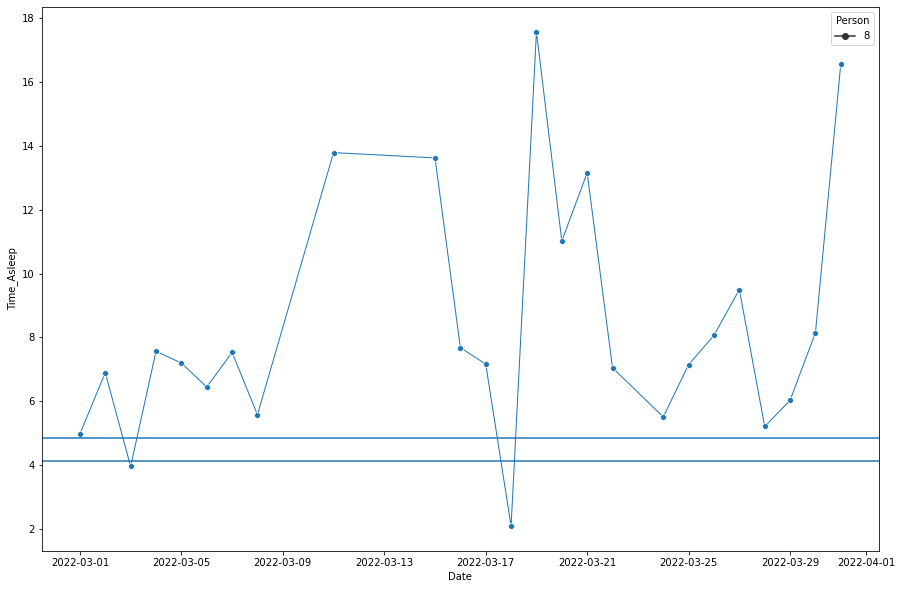

In [174]:
fig_7 = sns.lineplot(x='Date' , y='Time_Asleep', data=sleep_data[sleep_data['Date'].dt.month==3], linewidth=1, style ='Person', markers=True, dashes=False)
fig_7.axhline(out_1)
fig_7.axhline(out_2)
plt.show()

In [ ]:
# Marzo: outliers los días el 3 y el 18 

In [178]:
sleep_data[(sleep_data['Date'].dt.month==3) & (sleep_data['Time_Asleep']<4.86)]

,Date,Person,Time_Asleep,Time_in_bed
1740,2022-03-03,8,3.966667,3.966667
1774,2022-03-18,8,2.100000,2.100000


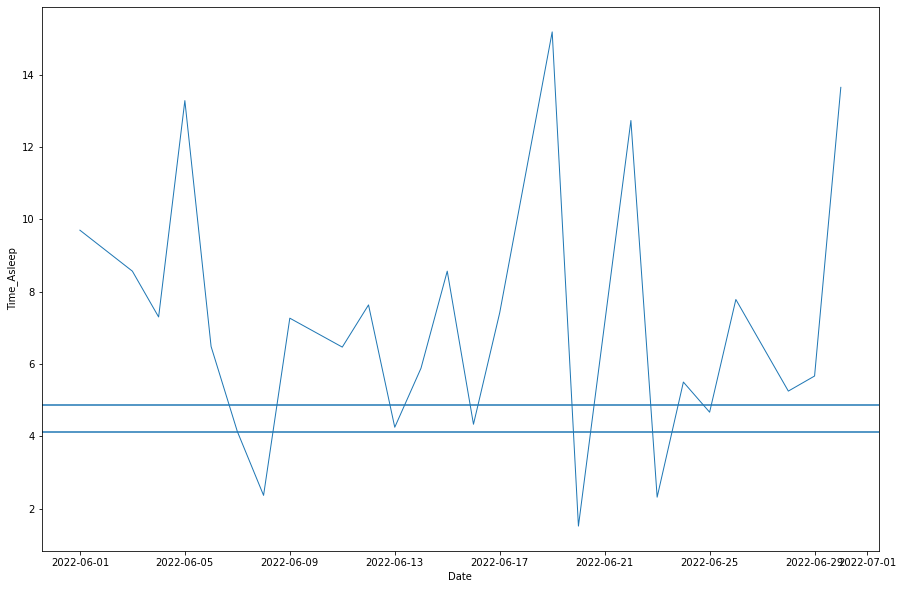

In [175]:
fig_8 = sns.lineplot(x='Date' , y='Time_Asleep', data=sleep_data[sleep_data['Date'].dt.month==6], linewidth=1)
fig_8.axhline(out_1)
fig_8.axhline(out_2)
plt.show()

In [ ]:
# Junio: outliers los días 7,8, 13, 16, 20, 23 y 25

In [179]:
sleep_data[(sleep_data['Date'].dt.month==6) & (sleep_data['Time_Asleep']<4.86)]

,Date,Person,Time_Asleep,Time_in_bed
1985,2022-06-07,8,4.133333,4.133333
1990,2022-06-08,8,2.366667,2.366667
2004,2022-06-13,8,4.250000,4.250000
2013,2022-06-16,8,4.333333,4.333333
2025,2022-06-20,8,1.516667,1.516667
2036,2022-06-23,8,2.316667,2.316667
2043,2022-06-25,8,4.666667,4.666667


`Observaciones finales`
- 